# Aula 7 - Segmentação de Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Exemplo Scikit-Learn

<Axes: >

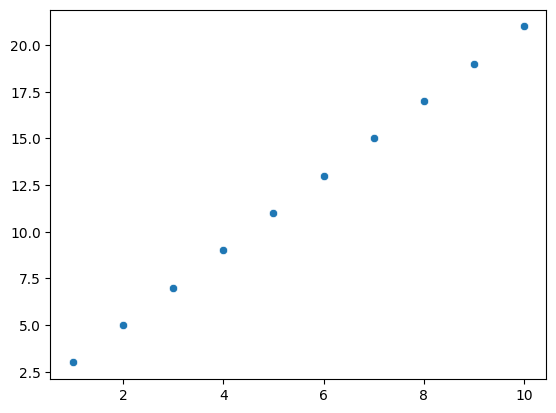

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21]).reshape(-1, 1)

sns.scatterplot(x=x.flatten(), y=y.flatten())

Fórmula: y = 2.0000000000000004x + 0.9999999999999982
Se x = 100, y = [[201.]]


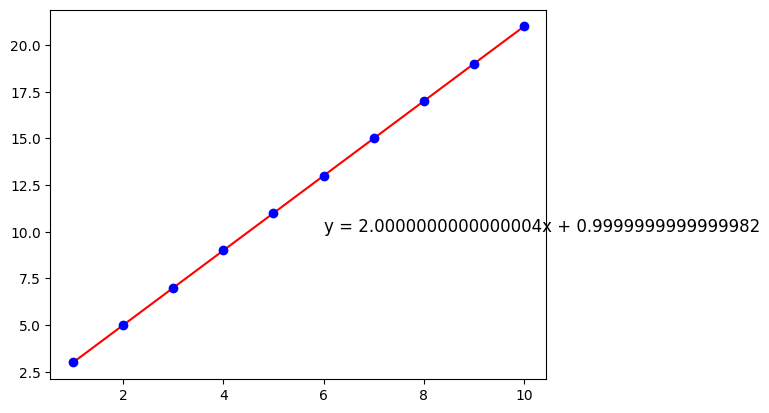

In [20]:
linear = LinearRegression()
linear.fit(x, y)

m = linear.coef_[0][0]
b = linear.intercept_[0]

print(f"Fórmula: y = {m}x + {b}")

plt.plot(x, linear.predict(x), color='red')
plt.plot(x.flatten(), y.flatten(), 'o', color='blue')
plt.text(6, 10, f"y = {m}x + {b}", fontsize=12)

print(f"Se x = 100, y = {linear.predict([[100]])}")

### Segmentação

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_excel('/content/drive/MyDrive/MATEUS/projetodois/LabExtracaoAnalise/bases/clientes.xlsx')
df

,Idade,Gênero,Renda_Mensal,Educação,Compras_Anuais
0,41,Feminino,8690,Ensino Fundamental,34
1,62,Masculino,8024,Ensino Superior,48
2,31,Feminino,5148,Ensino Superior,34
3,54,Feminino,9670,Ensino Superior,48
4,58,Masculino,12361,Ensino Médio,48
...,...,...,...,...,...
1998,42,Masculino,9961,Pós-Graduação,34
1999,43,Feminino,7251,Pós-Graduação,34
2000,27,Feminino,14664,Pós-Graduação,20
2001,27,Feminino,13913,Ensino Fundamental,20


In [21]:
#a coluna 'Gênero', que possui valores categóricos (textuais), está sendo convertida em valores numéricos. Feminino=1 e masculino=0.
#a coluna 'Educação' está sendo mapeada para números inteiros de acordo com o nível de escolaridade
df['Gênero'] = df['Gênero'].map({'Feminino': 0, 'Masculino': 1})
df['Educação'] = df['Educação'].map({'Ensino Fundamental': 1, 'Ensino Médio': 2, 'Ensino Superior': 3, 'Pós-Graduação': 4})

X = df.values

KeyError: 'Gênero'

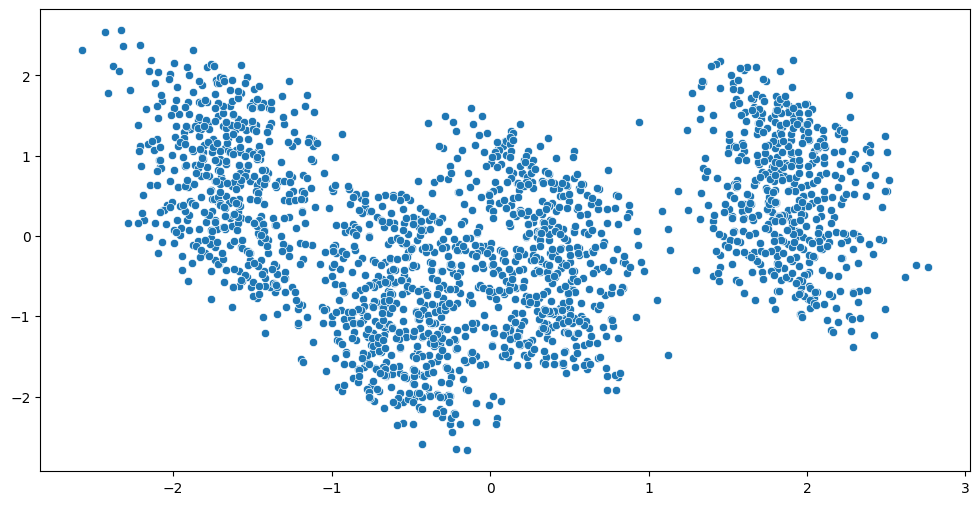

In [8]:
X = df.values
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()

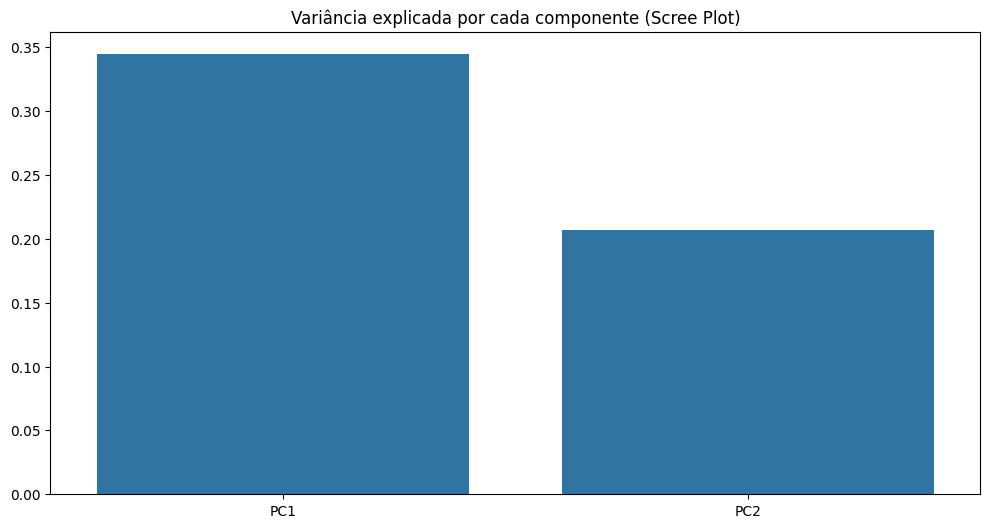

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=['PC1', 'PC2'], y=pca.explained_variance_ratio_)
plt.title('Variância explicada por cada componente (Scree Plot)')
plt.show()

In [24]:
#Clusterização
kmeans = KMeans(n_clusters=4)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

ValueError: Length of values (2003) does not match length of index (3)

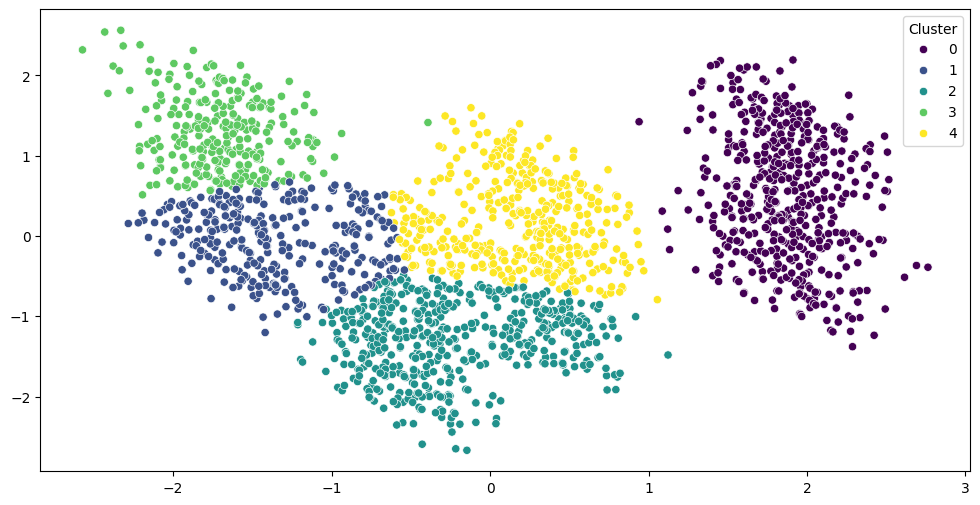

In [ ]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

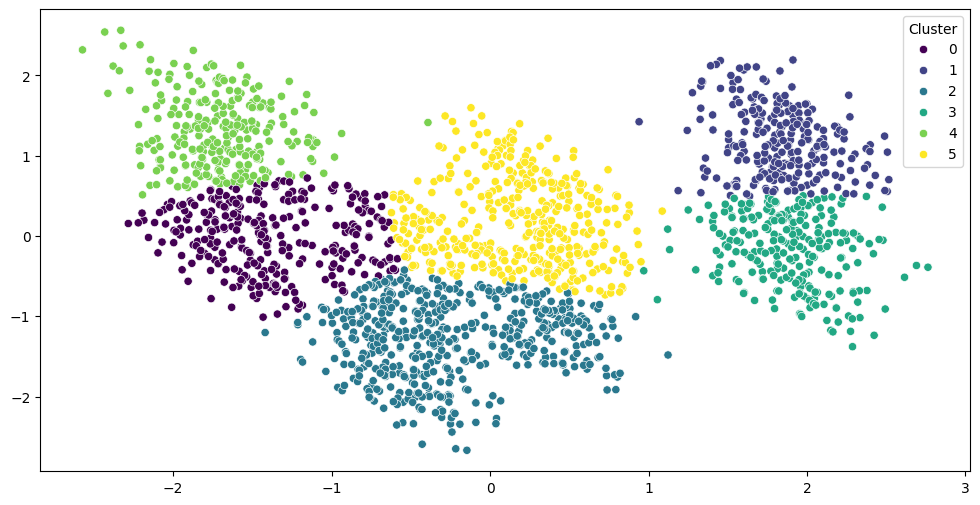

In [ ]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

In [ ]:
inercia = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    df['Cluster'] = kmeans.labels_
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 15), inercia, marker='o')
# plt.plot(3, inercia[1], marker='o', markersize=15, markeredgewidth=2, markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [ ]:
diff = np.diff(inercia)
maior_dif = np.argmin(diff) + 1
print(f'O número ideal de clusters é {list(range(2, 15))[maior_dif]}')

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=93)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

In [ ]:
df.groupby('Cluster').agg({'Idade': ['min', 'max', 'median'], 'Renda_Mensal': 'mean', 'Compras_Anuais': 'mean', 'Educação': ['min', 'max', 'median']})

In [19]:
df['Gênero'] = df['Gênero'].map({0: 'Feminino', 1: 'Masculino'})
df['Educação'] = df['Educação'].map({1: 'Ensino Fundamental', 2: 'Ensino Médio', 3: 'Ensino Superior', 4: 'Pós-Graduação'})

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))

for cluster in range(3): # Temos 3 clusters!
    sns.countplot(data=df[df['Cluster'] == cluster], x='Gênero', ax=ax[cluster, 0], palette='viridis')
    sns.histplot(data=df[df['Cluster'] == cluster], x='Idade', ax=ax[cluster, 1], kde=True, palette='viridis')
    ax[cluster, 1].set_xlim(18, 70)
    sns.histplot(data=df[df['Cluster'] == cluster], x='Compras_Anuais', ax=ax[cluster, 2], kde=True, palette='viridis', bins=5)
    ax[cluster, 2].set_xlim(5, 50)
    sns.histplot(data=df[df['Cluster'] == cluster], x='Renda_Mensal', ax=ax[cluster, 3], kde=True, palette='viridis')
    ax[cluster, 3].set_xlim(1000, 20000)
    ax[cluster, 0].set_title(f'Cluster {cluster}')
    sns.countplot(data=df[df['Cluster'] == cluster], x='Educação', ax=ax[cluster, 4], palette='viridis')
    ax[cluster, 4].set_xticklabels(['EF', 'EM', 'ES', 'Pós'])
    ax[cluster, 1].set_ylabel('')
    ax[cluster, 2].set_ylabel('')
    ax[cluster, 3].set_ylabel('')
    ax[cluster, 4].set_ylabel('')

KeyError: 'Gênero'

append() é usado para adicionar novas linhas a um DataFrame

In [11]:
import pandas as pd

# Criando dois DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Usando pd.concat para adicionar df2 ao final de df1
df_novo = pd.concat([df1, df2], ignore_index=True)

print(df_novo)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


if (condição):  Código a ser executado se a condição for verdadeira
else: Código a ser executado se a condição for falsa



In [12]:
idade = 18

if idade >= 18:
    print("Você é maior de idade.")
else:
    print("Você é menor de idade.")

Você é maior de idade.


utiliza o método agg() (ou aggregate) do Pandas para aplicar funções de agregação específicas a diferentes colunas de um DataFrame. Aí, será retornada a média do peso, a mediana e o desvio padrão da idade.

Df.agg({‘peso’: ‘median’, ‘idade’:[‘mean’, ‘std’]})

In [15]:
import pandas as pd

# Criando um DataFrame de exemplo
df = pd.DataFrame({
    'Nome': ['Alice', 'Bob', 'Charlie'],
    'Idade': [25, 30, 35]
})

# Criando uma nova coluna 'País' com um valor fixo
df['País'] = 'Brasil'

# Criando uma nova coluna 'Salário' com valores diferentes
df['Salário'] = [3000, 4000, 5000]

print(df)

      Nome  Idade    País  Salário
0    Alice     25  Brasil     3000
1      Bob     30  Brasil     4000
2  Charlie     35  Brasil     5000


In [16]:
# Criando uma nova coluna 'Salário Anual' com base em 'Salário'
df['Salário Anual'] = df['Salário'] * 12

print(df)

      Nome  Idade    País  Salário  Salário Anual
0    Alice     25  Brasil     3000          36000
1      Bob     30  Brasil     4000          48000
2  Charlie     35  Brasil     5000          60000


In [18]:
# Definindo uma função para classificar a idade
def classificar_idade(idade):
    if idade < 30:
        return 'Jovem'
    elif idade < 40:
        return 'Adulto'
    else:
        return 'Sênior'

# Criando uma nova coluna 'Classificação'
#.apply para lógicas mais complexas
df['Classificação'] = df['Idade'].apply(classificar_idade)

print(df)

      Nome  Idade    País  Salário  Salário Anual Classificação
0    Alice     25  Brasil     3000          36000         Jovem
1      Bob     30  Brasil     4000          48000        Adulto
2  Charlie     35  Brasil     5000          60000        Adulto
